<a href="https://colab.research.google.com/github/benequith/Rock-vs-Mine-Detection/blob/master/Sonar_Rock_vs_Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the dependencies

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

### Data Collection and Pre-Processing

In [3]:
df= pd.read_csv('/content/Copy of sonar data.csv', header= None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.shape

(208, 61)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
X= df.drop(columns=60, axis=1)
Y= df[60]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.1, stratify= Y,random_state=1)

In [9]:
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [11]:
Y_train_pred= model.predict(X_train)
acc_score= accuracy_score(Y_train_pred, Y_train)

In [12]:
print("Accuracy of the model on training data: {}".format(acc_score))

Accuracy of the model on training data: 0.8342245989304813


In [13]:
Y_test_pred= model.predict(X_test)
acc_score_test= accuracy_score(Y_test_pred, Y_test)

print("Accuracy of the model on training data: {}".format(acc_score_test))

Accuracy of the model on training data: 0.7619047619047619


In [14]:
Y_test_pred

array(['M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R'], dtype=object)

As we can see we got a poor score when we decided to train the model without pre-processing it much. So let us try again by cleaning the data

### Finding and eliminating features that are correlated

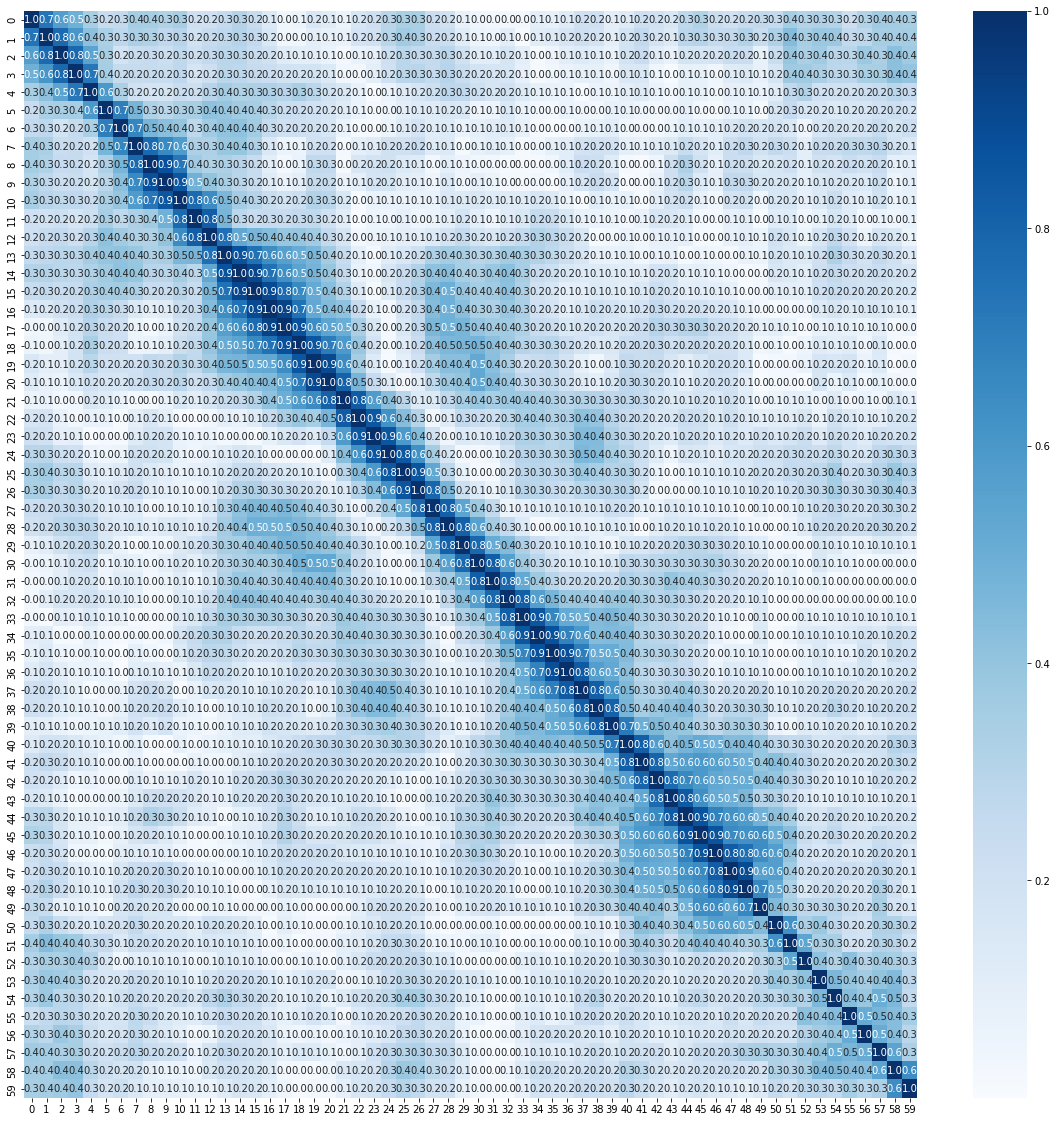

In [17]:
correlation_matrix= df.corr().abs()
plt.figure(figsize= (20,20))
sns.heatmap(correlation_matrix, cbar= True, fmt= '.1f', annot= True, cmap= 'Blues')
plt.show()

In [19]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

    0         1         2         3         4         5         6         7   \
0  NaN  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815  0.355523   
1  NaN       NaN  0.779916  0.606684  0.419669  0.332329  0.279040  0.334615   
2  NaN       NaN       NaN  0.781786  0.546141  0.346275  0.190434  0.237884   
3  NaN       NaN       NaN       NaN  0.726943  0.352805  0.246440  0.246742   
4  NaN       NaN       NaN       NaN       NaN  0.597053  0.335422  0.204006   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.702889  0.471683   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.675774   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

[15, 17, 20]


In [22]:
df1 = df.drop(df.columns[to_drop], axis=1)

In [24]:
df1.shape

(208, 58)

In [28]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [31]:
df1[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### Decoding the Target Variable to 0s and 1s

In [32]:
### Converting the Target variable into a Decoded format
label_encoder = preprocessing.LabelEncoder()
df1[60]= label_encoder.fit_transform(df[60])

df1[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

### Outlier Detection and Removal

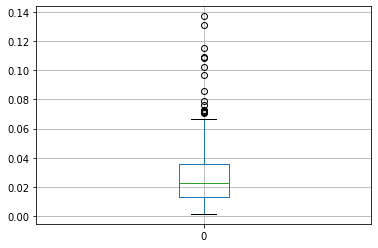

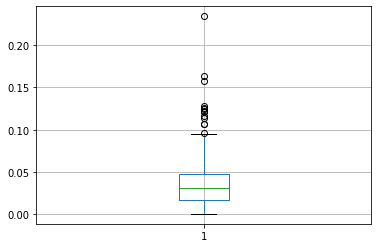

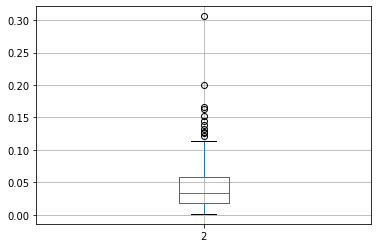

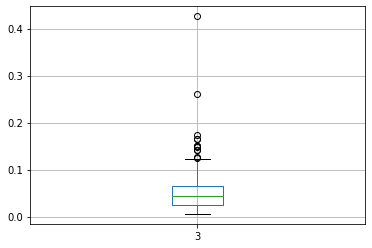

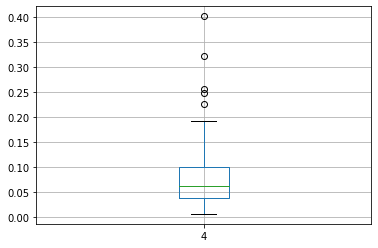

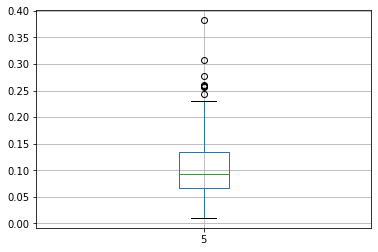

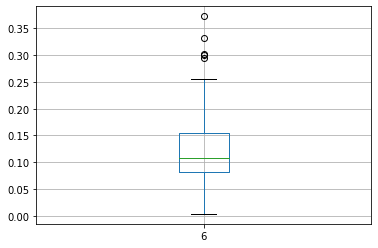

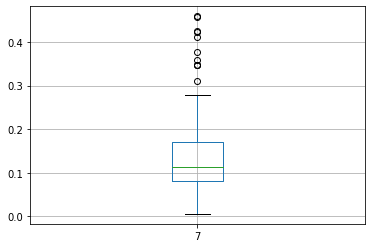

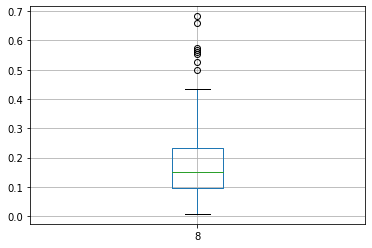

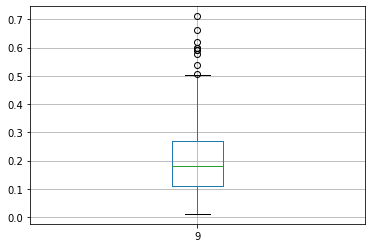

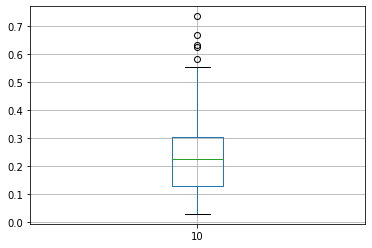

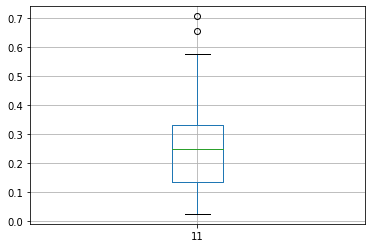

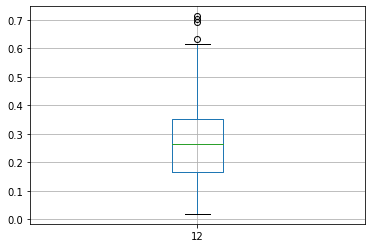

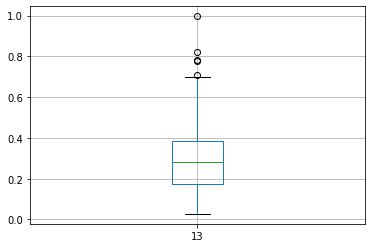

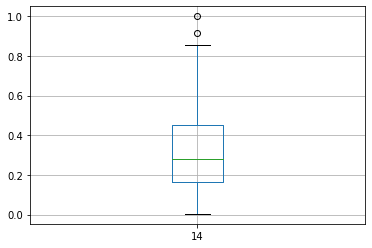

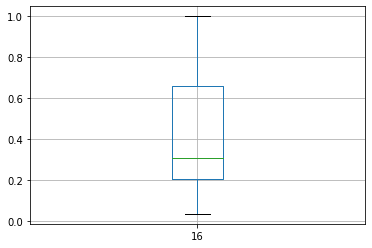

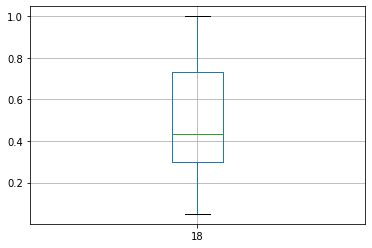

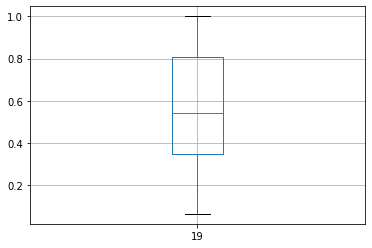

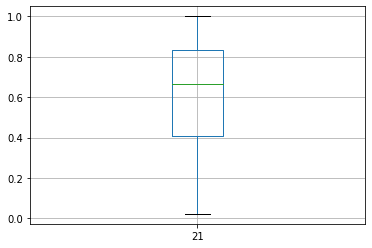

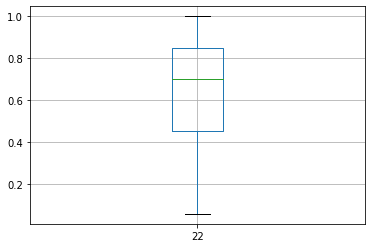

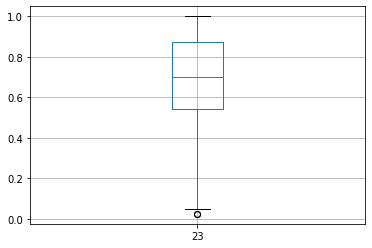

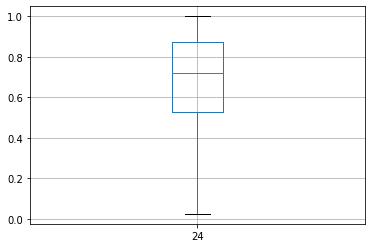

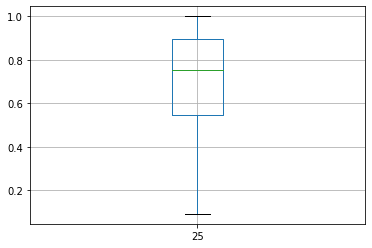

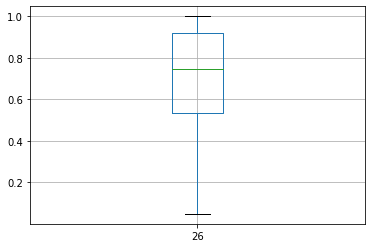

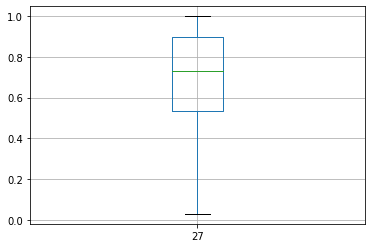

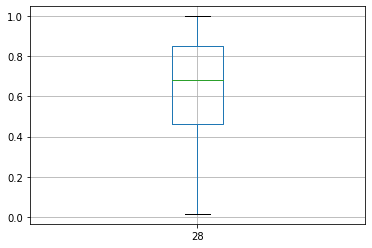

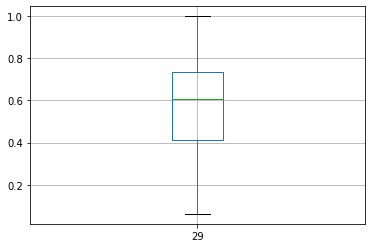

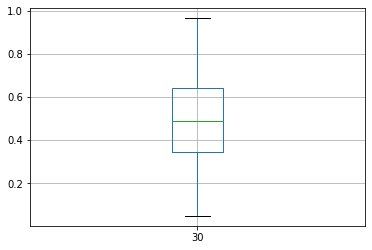

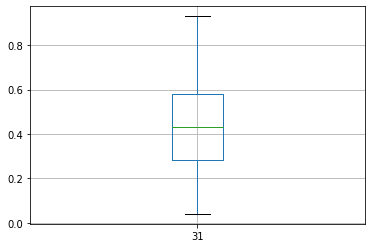

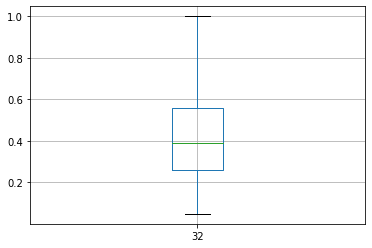

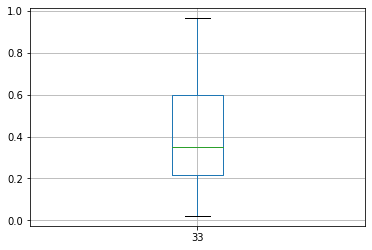

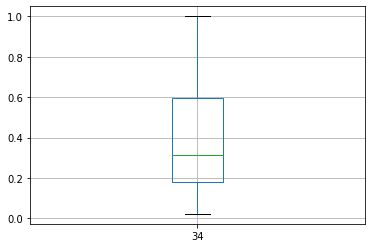

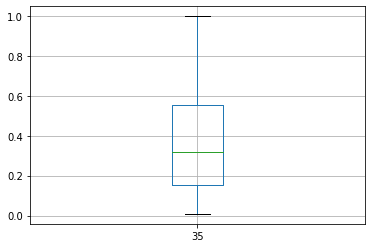

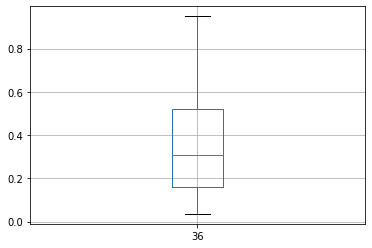

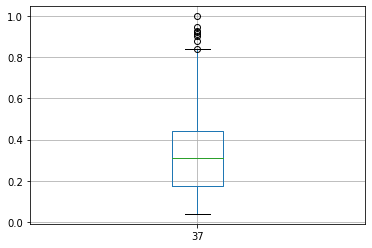

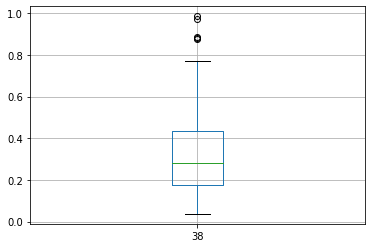

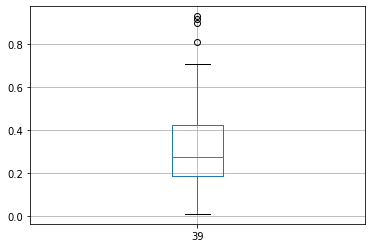

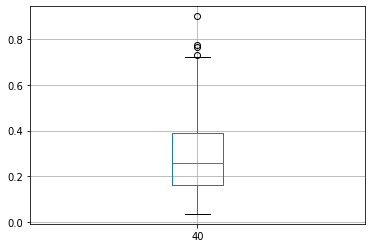

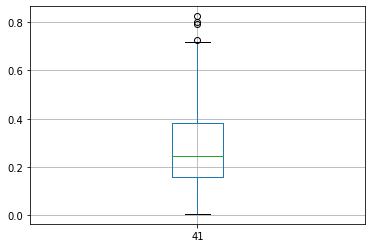

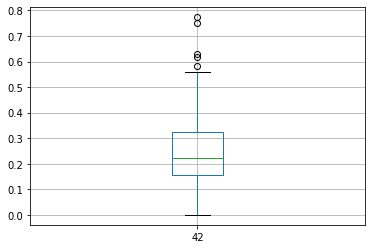

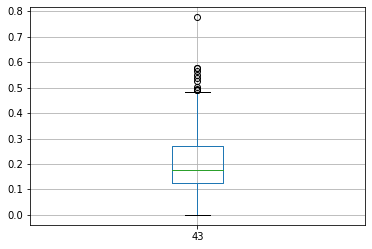

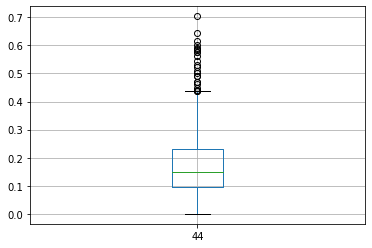

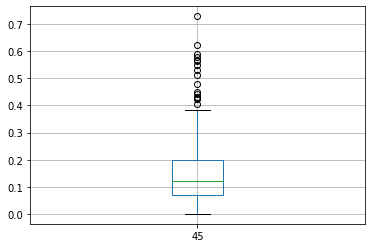

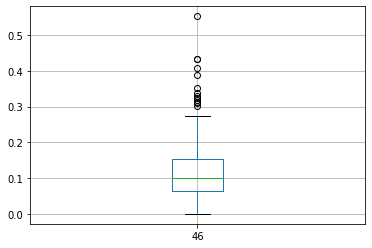

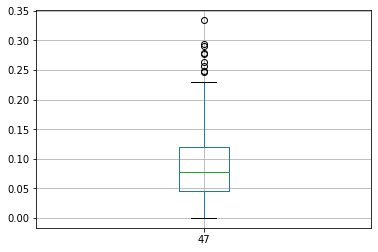

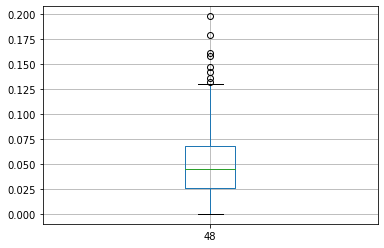

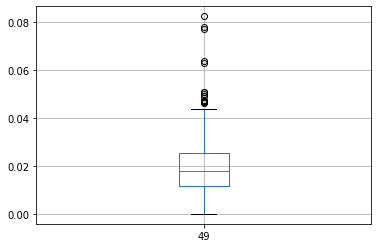

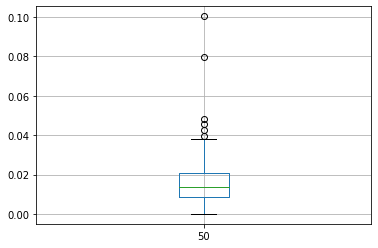

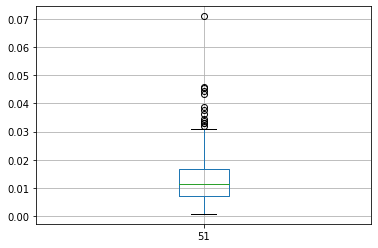

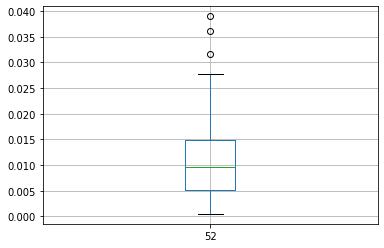

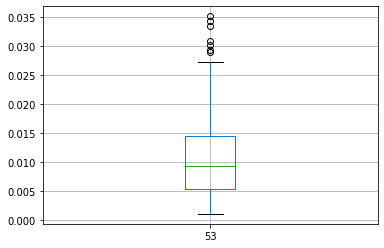

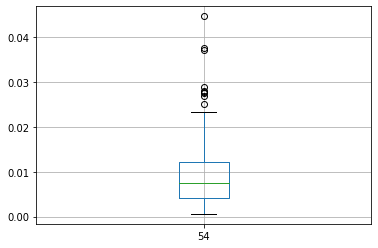

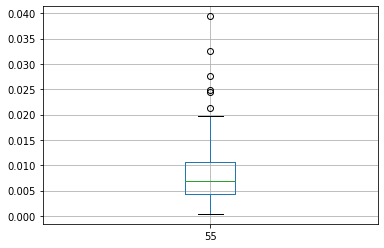

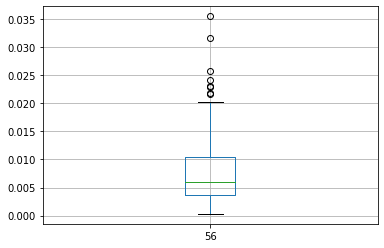

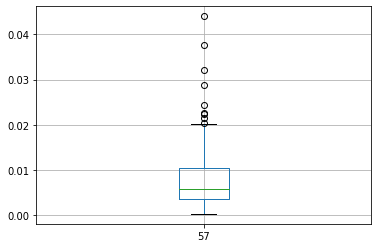

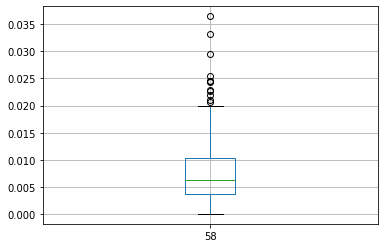

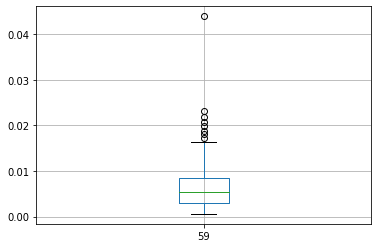

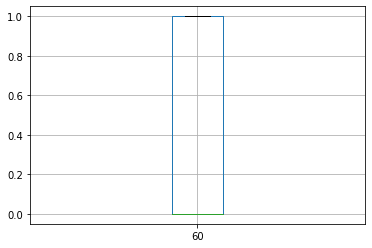

In [33]:
for col in df1:
  plt.figure()
  df1.boxplot([col])
  plt.show()

In [66]:
from scipy.stats import zscore
print('Before outlier removal shape was: ', df1.shape)
ent= [x for x in df1]
ent.pop(-1)
print(ent)
z_scores = zscore(df1[ent])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df2 = df1[filtered_entries]


Before outlier removal shape was:  (193, 58)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
After removal of outliers, shape is:  (208, 61)


In [67]:
print('After removal of outliers, shape is: ', df2.shape)

After removal of outliers, shape is:  (158, 58)


In [71]:
df2[60].value_counts()

1    80
0    78
Name: 60, dtype: int64

### Model training and Evaluation

In [76]:
X= df2.drop(columns=60, axis=1)
Y= df2[60]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.1, stratify= Y,random_state=1)

In [77]:
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [78]:
Y_train_pred= model.predict(X_train)
acc_score= accuracy_score(Y_train_pred, Y_train)
print("Accuracy of the model on training data: {}".format(acc_score))

Accuracy of the model on training data: 0.8732394366197183


In [79]:
Y_test_pred= model.predict(X_test)
acc_score_test= accuracy_score(Y_test_pred, Y_test)

print("Accuracy of the model on training data: {}".format(acc_score_test))

Accuracy of the model on training data: 0.8125


Hence by removing outliers and correlated features we have improved the accuracy of the model